In [5]:
!pip install pyserial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 641.8 kB/s eta 0:00:00 0:00:01m


In [14]:
import serial
import matplotlib.pyplot as plt
from datetime import datetime
import time
import numpy as np

In [28]:
ser.close()

In [29]:
serial_port = "COM9"
baud_rate = 9600

ser = serial.Serial(serial_port, baud_rate)


In [30]:
times = []
distances = []
means = []
variances = []

260.49

2023-11-05 23:41:06.022884: Distance = 260.49 cm, Mean = 260.49 cm, Variance = 0.0 cm^2
260.06

2023-11-05 23:41:07.023878: Distance = 260.06 cm, Mean = 260.275 cm, Variance = 0.046225000000001466 cm^2
260.13

2023-11-05 23:41:08.024875: Distance = 260.13 cm, Mean = 260.22666666666663 cm, Variance = 0.03548888888889053 cm^2
260.08

2023-11-05 23:41:09.025766: Distance = 260.08 cm, Mean = 260.19 cm, Variance = 0.030650000000002228 cm^2
260.05

2023-11-05 23:41:10.026975: Distance = 260.05 cm, Mean = 260.162 cm, Variance = 0.02765600000000117 cm^2
260.47

2023-11-05 23:41:11.028102: Distance = 260.47 cm, Mean = 260.2133333333333 cm, Variance = 0.03622222222222549 cm^2
260.47

2023-11-05 23:41:12.029306: Distance = 260.47 cm, Mean = 260.25 cm, Variance = 0.039114285714289924 cm^2
260.06

2023-11-05 23:41:13.030213: Distance = 260.06 cm, Mean = 260.22625 cm, Variance = 0.03817343750000393 cm^2
260.11

2023-11-05 23:41:14.031241: Distance = 260.11 cm, Mean = 260.21333333333337 cm, V

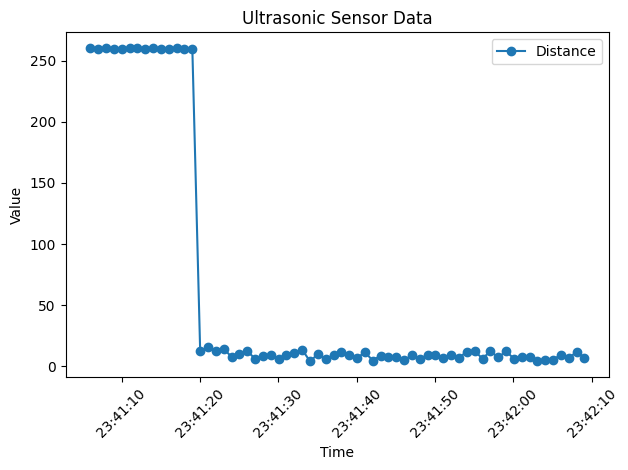

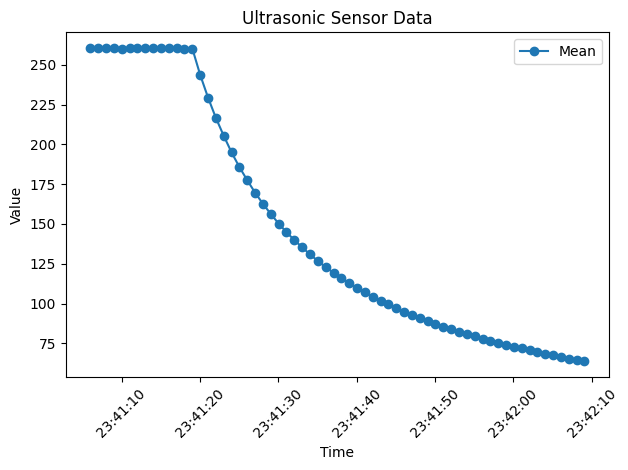

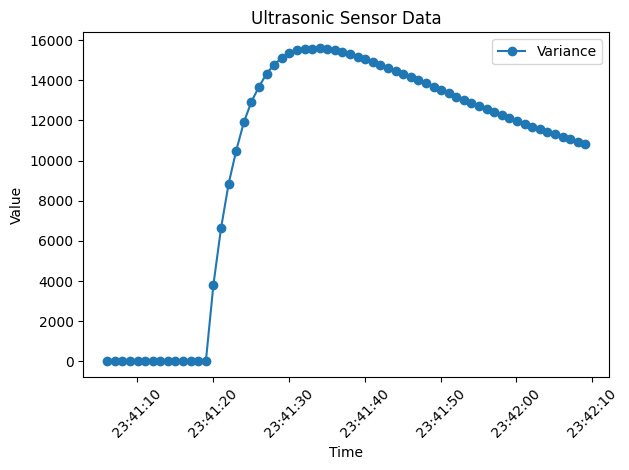

In [31]:
try:
    while True:
        distance_str = ser.readline().decode('utf-8')
        print(distance_str)
        distance = float(distance_str)
        current_time = datetime.now()
        times.append(current_time)
        distances.append(distance)

        # Calculate mean and variance
        mean_distance = np.mean(distances)
        variance_distance = np.var(distances)

        means.append(mean_distance)
        variances.append(variance_distance)

        print(f"{current_time}: Distance = {distance} cm, Mean = {mean_distance} cm, Variance = {variance_distance} cm^2")
        time.sleep(1)

except KeyboardInterrupt:
    ser.close()

    # Plotting
    plt.plot(times, distances, marker='o', label='Distance')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Ultrasonic Sensor Data')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.plot(times, means, marker='o', label='Mean')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Ultrasonic Sensor Data')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.plot(times, variances, marker='o', label='Variance')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Ultrasonic Sensor Data')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
